## 🧩 Этап 1. Анализ и очистка данных (Pandas)

### 1️⃣ Предварительный анализ
- Загрузите датасет и посмотрите первые 10 строк.
- Определите размер таблицы и типы данных.
- Проверьте количество уникальных значений в основных колонках.
- Найдите количество пропусков и процент пропущенных значений в каждом столбце.
- Удалите строки, где отсутствует `CustomerID` или `Description`.
- Удалите дубликаты.

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
#1.1 Загрузите датасет и посмотрите первые 10 строк.

df = pd.read_csv('/Users/nikolajantonevic/Desktop/online_retail_II.csv')
#pd.set_option('display.max_columns', None)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [55]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
#1.2 Определите размер таблицы и типы данных.
df.shape

(1067371, 8)

In [56]:
df.size

8538968

In [ ]:
#1.3 Проверьте количество уникальных значений в основных колонках.
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [ ]:
#1.4 Найдите количество пропусков и процент пропущенных значений в каждом столбце.
df.isna().sum()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1067366,False,False,False,False,False,False,False,False
1067367,False,False,False,False,False,False,False,False
1067368,False,False,False,False,False,False,False,False
1067369,False,False,False,False,False,False,False,False


In [69]:
df.isna().sum()/df.size

Invoice        0.000000
StockCode      0.000000
Description    0.000513
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.028459
Country        0.000000
dtype: float64

In [70]:
#1.5 Удалите строки, где отсутствует `CustomerID` или `Description`.
df = df.dropna(subset=['Customer ID', 'Description'])
df[['Customer ID', 'Description']].isna().sum()

Customer ID    0
Description    0
dtype: int64

In [71]:
#1.6 Удалите дубликаты строк, если они есть.
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [72]:
df.drop_duplicates(inplace=True)

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### 2️⃣ Обогащение данных
- Создайте новый столбец `TotalPrice = Quantity * UnitPrice`.
- Создайте столбец `InvoiceMonth` = месяц из `InvoiceDate`.
- Создайте столбец `IsReturn` = 1, если `Quantity` < 0 (возврат товара), иначе 0.
- Найдите клиентов с наибольшей долей возвратов.

In [73]:
#2.1 Создайте новый столбец `TotalPrice = Quantity * UnitPrice`.
df['TotalPrice'] = df['Quantity'] * df['Price']
df[['Quantity', 'Price', 'TotalPrice']].head()

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/1292853882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


,Quantity,Price,TotalPrice
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [74]:
#2.2 Создайте столбец `InvoiceMonth` = месяц из `InvoiceDate`.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df[['InvoiceDate', 'InvoiceMonth']].head()
df.dtypes

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/3181364747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/3181364747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.month


Invoice                 object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
Price                  float64
Customer ID            float64
Country                 object
TotalPrice             float64
InvoiceMonth             int32
dtype: object

In [75]:
#2.3 Создайте столбец `IsReturn` = 1, если `Quantity` < 0 (возврат товара), иначе 0.
df['IsReturn'] = (df['Quantity'] < 0).astype(int) #false - 0, true - 1
df[['Quantity', 'IsReturn']].head(10)

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/2311600016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsReturn'] = (df['Quantity'] < 0).astype(int) #false - 0, true - 1


,Quantity,IsReturn
0,12,0
1,12,0
2,12,0
3,48,0
4,24,0
5,24,0
6,24,0
7,10,0
8,12,0
9,12,0


In [76]:
#2.4 Найдите клиентов с наибольшей долей возвратов.
returns_by_customer = (
    df.groupby('Customer ID')['IsReturn']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_orders', 'sum': 'returns'})
)
# Доля возвратов
returns_by_customer['return_rate'] = returns_by_customer['returns'] / returns_by_customer['total_orders']
top_return_customers = returns_by_customer.sort_values(by='return_rate', ascending=False)
print(top_return_customers.head(10))

             total_orders  returns  return_rate
Customer ID                                    
14313.0                 1        1          1.0
13231.0                 1        1          1.0
13100.0                 1        1          1.0
13664.0                 1        1          1.0
16703.0                 1        1          1.0
15383.0                 1        1          1.0
16853.0                 2        2          1.0
15357.0                 1        1          1.0
16879.0                 2        2          1.0
16981.0                 1        1          1.0


### 3️⃣ Исследование продаж
- Найдите:
  - топ-10 популярных товаров.
  - топ-5 стран по количеству покупок и по выручке.
  - средний чек по странам.
  - среднее количество товаров на заказ.
- Найдите дни недели с максимальной и минимальной выручкой.
- Найдите среднюю выручку по каждому месяцу.

In [77]:
#3.1 топ-10 популярных товаров.
top_10_products = (
    df.groupby('Description', as_index=False)   
    .agg(total_quantity=('Quantity', 'sum'))  
    .sort_values('total_quantity', ascending=False)  
    .head(10) 
)

print(top_10_products)

                             Description  total_quantity
5183   WORLD WAR 2 GLIDERS ASSTD DESIGNS          103505
5061  WHITE HANGING HEART T-LIGHT HOLDER           88126
292        ASSORTED COLOUR BIRD ORNAMENT           77755
2397             JUMBO BAG RED RETROSPOT           73033
753                  BROCADE RING PURSE            69343
3072  PACK OF 60 PINK PAISLEY CAKE CASES           54373
157          60 TEATIME FAIRY CAKE CASES           52502
3074    PACK OF 72 RETRO SPOT CAKE CASES           44480
3075     PACK OF 72 RETROSPOT CAKE CASES           44356
4517                SMALL POPCORN HOLDER           42592


In [78]:
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [79]:
#3.2 топ-5 стран по количеству покупок и по выручке.
top_5_country_Quantity = (
    df.groupby('Country', as_index=False) 
    .agg(total_quantity=('Quantity', 'sum'), 
        Total_revenue=('TotalPrice', 'sum'))  
    .sort_values('total_quantity', ascending=False)
    .head(5)  
)

print(top_5_country_Quantity)

           Country  total_quantity  Total_revenue
38  United Kingdom         8194318   1.348251e+07
24     Netherlands          381853   5.483307e+05
10            EIRE          309717   5.735098e+05
9          Denmark          234764   6.445959e+04
14         Germany          221816   4.119592e+05


In [80]:
top_5_country_revenue = (
    df.groupby('Country', as_index=False) 
    .agg(Total_revenue=('TotalPrice', 'sum'))  
    .sort_values('Total_revenue', ascending=False)
    .head(5)  
)

print(top_5_country_revenue)

           Country  Total_revenue
38  United Kingdom   1.348251e+07
10            EIRE   5.735098e+05
24     Netherlands   5.483307e+05
14         Germany   4.119592e+05
13          France   3.200463e+05


In [81]:
#3.3 средний чек по странам.
avg_revenue_country = (
    df.groupby('Country', as_index=False)
    .agg(total_revenue=('TotalPrice', 'sum'),
        total_quantity=('Quantity', 'sum'))
)

avg_revenue_country['avg_revenue'] = avg_revenue_country['total_revenue'] / avg_revenue_country['total_quantity']

avg_revenue_country = avg_revenue_country.sort_values('avg_revenue', ascending=False)

print(avg_revenue_country.head(5))

               Country  total_revenue  total_quantity  avg_revenue
21             Lebanon        1693.88             386     4.388290
11  European Community        1291.75             497     2.599095
4               Brazil        1411.87             545     2.590587
15              Greece       18995.49            7707     2.464706
7               Cyprus       24032.56           10652     2.256155


In [82]:
avg_revenue_country2 = (
    df.groupby('Country', as_index=False)
    .agg(total_quantity=('Quantity', 'sum'),
        total_revenue=('TotalPrice', 'sum'))
)

avg_revenue_country2['avg_revenue'] = avg_revenue_country2['total_revenue'] / avg_revenue_country2['total_quantity']
avg_revenue_country2 = avg_revenue_country2.sort_values('total_revenue', ascending=False).head(5)

print(avg_revenue_country2)

           Country  total_quantity  total_revenue  avg_revenue
38  United Kingdom         8194318   1.348251e+07     1.645348
10            EIRE          309717   5.735098e+05     1.851722
24     Netherlands          381853   5.483307e+05     1.435973
14         Germany          221816   4.119592e+05     1.857211
13          France          179959   3.200463e+05     1.778440


In [83]:
#3.4 среднее количество товаров на заказ.
avg_revenue_country3 = (
    df.groupby('Country', as_index=False)
    .agg(total_quantity=('Quantity', 'sum'),
        total_orders=('Invoice', 'nunique'))
)

avg_revenue_country3['avg_Description_per_quantity'] = avg_revenue_country3['total_quantity'] / avg_revenue_country3['total_orders']
avg_revenue_country3 = avg_revenue_country3.sort_values('avg_Description_per_quantity', ascending=False).head(5)

print(avg_revenue_country3)

        Country  total_quantity  total_orders  avg_Description_per_quantity
9       Denmark          234764            53                   4429.509434
24  Netherlands          381853           250                   1527.412000
35     Thailand            2552             2                   1276.000000
0     Australia          103375           117                    883.547009
33       Sweden           87720           128                    685.312500


In [84]:
avg_items_per_order = (
    df.groupby(['Country', 'Invoice'], as_index=False)
    .agg(total_quantity=('Quantity', 'sum'))
    .groupby('Country', as_index=False)
    .agg(avg_items_per_order=('total_quantity', 'mean'))
    .sort_values('avg_items_per_order', ascending=False)
)

print(avg_items_per_order.head(5))

        Country  avg_items_per_order
9       Denmark          4429.509434
24  Netherlands          1527.412000
35     Thailand          1276.000000
0     Australia           883.547009
33       Sweden           685.312500


In [85]:
#3.5 Найдите дни недели с максимальной и минимальной выручкой.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M') 

revenue_by_weekday = (
    df.groupby('Weekday', as_index=False)
    .agg(total_revenue=('TotalPrice', 'sum'))
)

max_day = revenue_by_weekday.loc[revenue_by_weekday['total_revenue'].idxmax()]
min_day = revenue_by_weekday.loc[revenue_by_weekday['total_revenue'].idxmin()]

print("День недели с максимальной выручкой:", max_day['Weekday'], "—", max_day['total_revenue'])
print("День недели с минимальной выручкой:", min_day['Weekday'], "—", min_day['total_revenue'])


День недели с максимальной выручкой: Thursday — 3524977.262
День недели с минимальной выручкой: Saturday — 9803.05


/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/2772251403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/2772251403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year
/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/2772251403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [86]:
#3.6 Найдите среднюю выручку по каждому месяцу.
avg_revenue_yearmount = (
    df.groupby('YearMonth', as_index=False)
    .agg(avg_revenue=('TotalPrice', 'sum'))
#   .sort_values('avg_revenue', ascending=False)
)
print (avg_revenue_yearmount)

   YearMonth  avg_revenue
0    2009-12   660125.100
1    2010-01   530436.512
2    2010-02   487596.426
3    2010-03   633419.311
4    2010-04   558007.832
5    2010-05   557873.390
6    2010-06   568784.550
7    2010-07   560885.330
8    2010-08   585259.460
9    2010-09   778520.051
10   2010-10   961520.740
11   2010-11  1129025.162
12   2010-12   552372.860
13   2011-01   473731.900
14   2011-02   435534.070
15   2011-03   578576.210
16   2011-04   425222.671
17   2011-05   647011.670
18   2011-06   606862.520
19   2011-07   573112.321
20   2011-08   615078.090
21   2011-09   929356.232
22   2011-10   973306.380
23   2011-11  1126815.070
24   2011-12   341557.430


### 4️⃣ Визуализация (Matplotlib / Seaborn / Plotly)
- Постройте гистограмму распределения `UnitPrice` и `TotalPrice`.
- Постройте boxplot для выручки (`TotalPrice`) по странам.
- Нарисуйте топ-10 товаров по количеству продаж.
- Визуализируйте выручку по месяцам.
- Постройте heatmap корреляции между числовыми признаками.
- Постройте pie chart распределения заказов по странам.
- Нарисуйте scatterplot зависимости `Quantity` и `TotalPrice`.

In [87]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,IsReturn,Year,Month,Day,Weekday,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,0,2009,12,1,Tuesday,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0,2009,12,1,Tuesday,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0,2009,12,1,Tuesday,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,0,2009,12,1,Tuesday,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,0,2009,12,1,Tuesday,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,0,2011,12,9,Friday,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0,2011,12,9,Friday,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0,2011,12,9,Friday,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,0,2011,12,9,Friday,2011-12


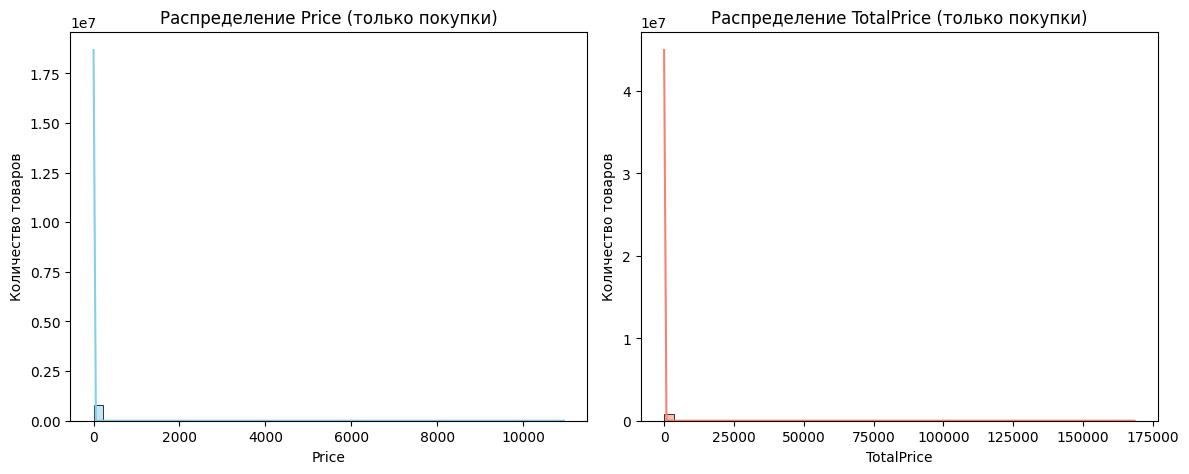

In [88]:
#4.1 Постройте гистограмму распределения `Price` и `TotalPrice`.
df_positive = df[df['Quantity'] > 0]
plt.figure(figsize=(12,5))

# Price
plt.subplot(1,2,1)
sns.histplot(df_positive['Price'], bins=50, kde=True, color='skyblue')
plt.title('Распределение Price (только покупки)')
plt.xlabel('Price')
plt.ylabel('Количество товаров')

# TotalPrice
plt.subplot(1,2,2)
sns.histplot(df_positive['TotalPrice'], bins=50, kde=True, color='salmon')
plt.title('Распределение TotalPrice (только покупки)')
plt.xlabel('TotalPrice')
plt.ylabel('Количество товаров')

plt.tight_layout()
plt.show()

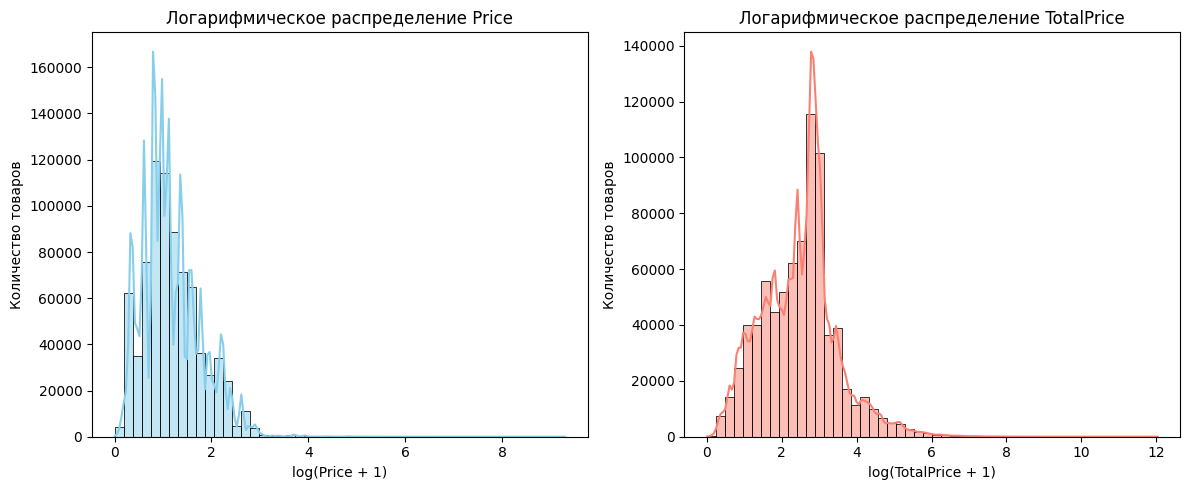

In [89]:
#4.1 Постройте гистограмму распределения `Price` и `TotalPrice`.
df_positive = df[(df['Quantity'] > 0) & (df['Price'] > 0) & (df['TotalPrice'] > 0)]
plt.figure(figsize=(12,5))

# Price
plt.subplot(1,2,1)
sns.histplot(np.log1p(df_positive['Price']), bins=50, kde=True, color='skyblue')
plt.title('Логарифмическое распределение Price')
plt.xlabel('log(Price + 1)')
plt.ylabel('Количество товаров')

# TotalPrice
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_positive['TotalPrice']), bins=50, kde=True, color='salmon')
plt.title('Логарифмическое распределение TotalPrice')
plt.xlabel('log(TotalPrice + 1)')
plt.ylabel('Количество товаров')

plt.tight_layout()
plt.show()

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/331347995.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


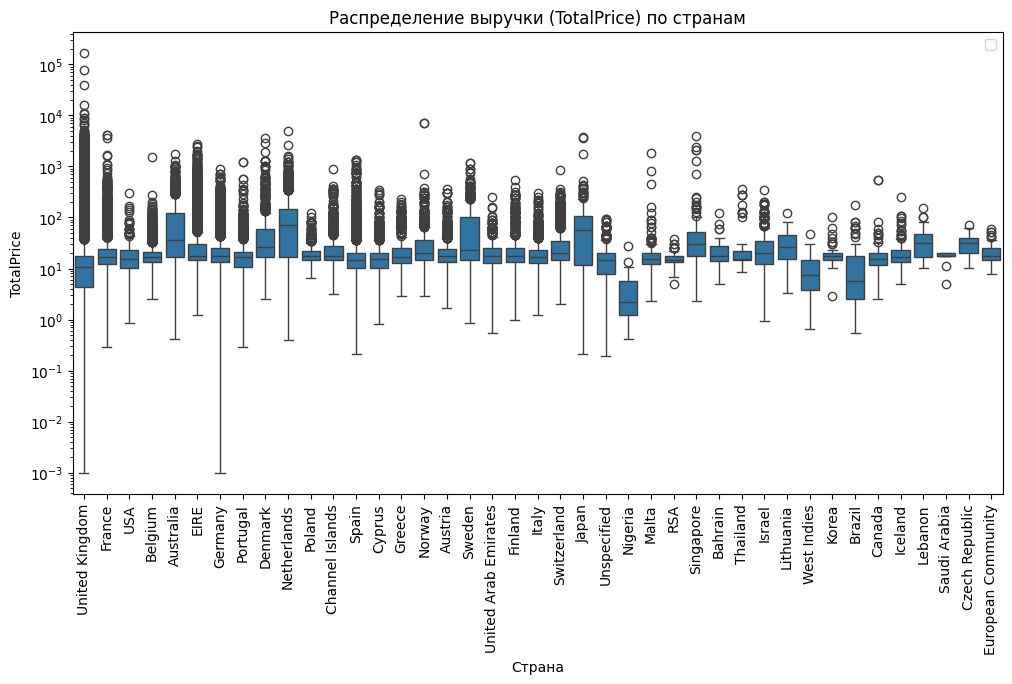

In [90]:
#4.2 Постройте boxplot для выручки (`TotalPrice`) по странам.
df_positive = df[df['TotalPrice'] > 0]

plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='TotalPrice', data=df_positive)
plt.title('Распределение выручки (TotalPrice) по странам')
plt.xlabel('Страна')
plt.ylabel('TotalPrice')
plt.xticks(rotation=90)  # поворачиваем подписи стран для удобства
plt.yscale('log')  # логарифмическая шкала, чтобы выбросы не сжимали график
plt.legend()
plt.show()

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/1824854840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_quantity', y='Description', data=top_10_products, palette='viridis')


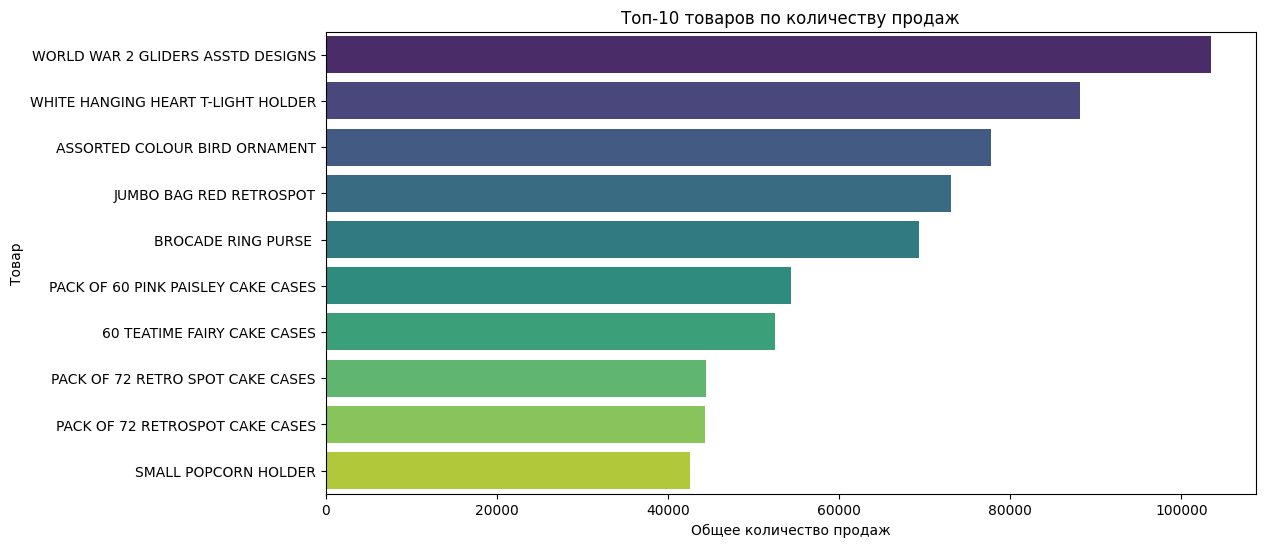

In [91]:
#4.3 Нарисуйте топ-10 товаров по количеству продаж.
plt.figure(figsize=(12,6))
sns.barplot(x='total_quantity', y='Description', data=top_10_products, palette='viridis')
plt.title('Топ-10 товаров по количеству продаж')
plt.xlabel('Общее количество продаж')
plt.ylabel('Товар')
plt.show()

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_44374/2552797958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearMonth', y='avg_revenue', data=avg_revenue_yearmount, palette='viridis')


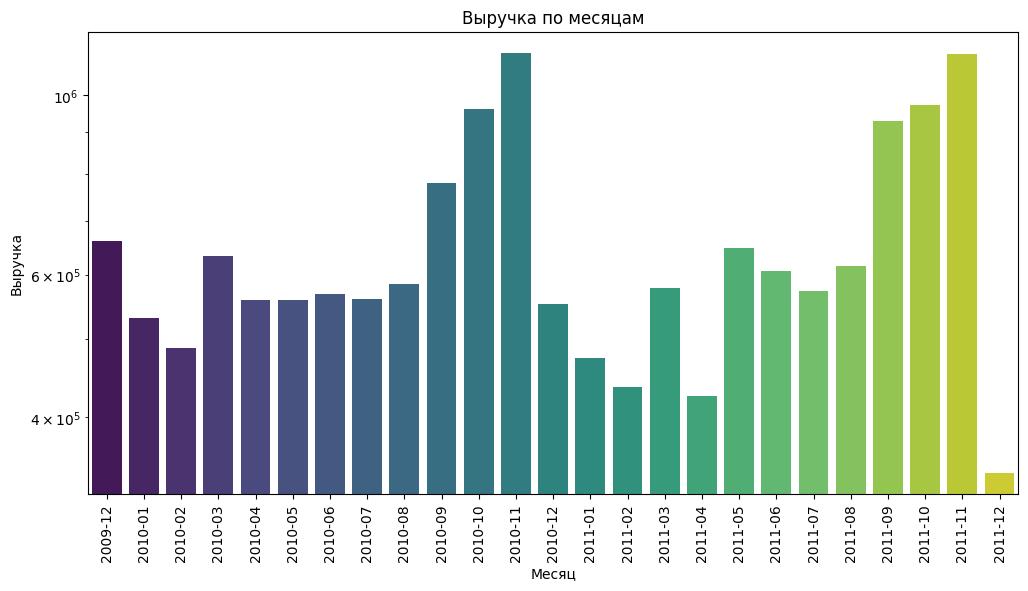

In [92]:
#4.4 Визуализируйте выручку по месяцам.
plt.figure(figsize=(12,6))
sns.barplot(x='YearMonth', y='avg_revenue', data=avg_revenue_yearmount, palette='viridis')
plt.yscale('log')
plt.title('Выручка по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.xticks(rotation=90) 
plt.show()

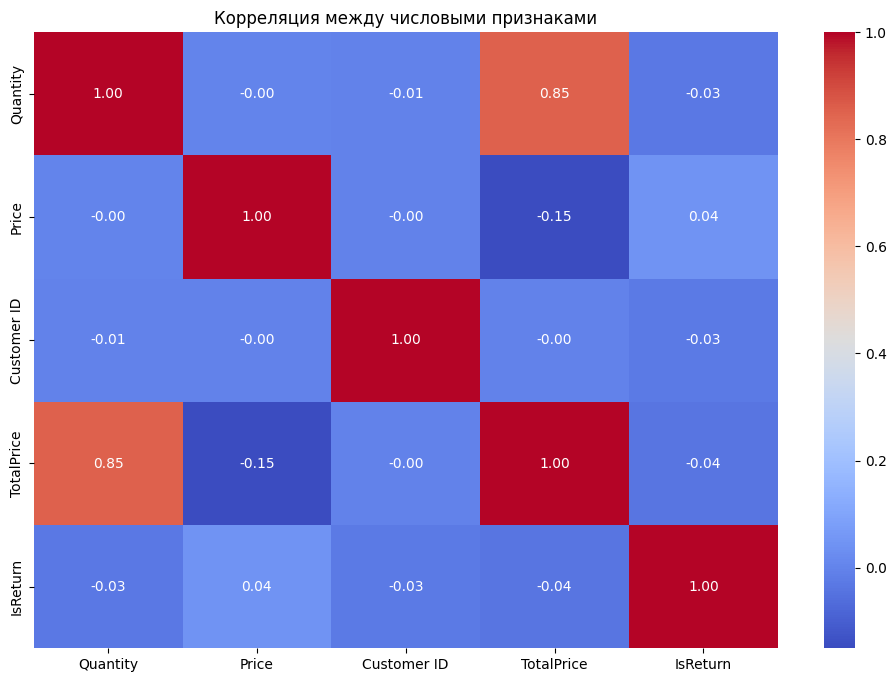

In [93]:
#4.5 Постройте heatmap корреляции между числовыми признаками.
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между числовыми признаками')
plt.show()

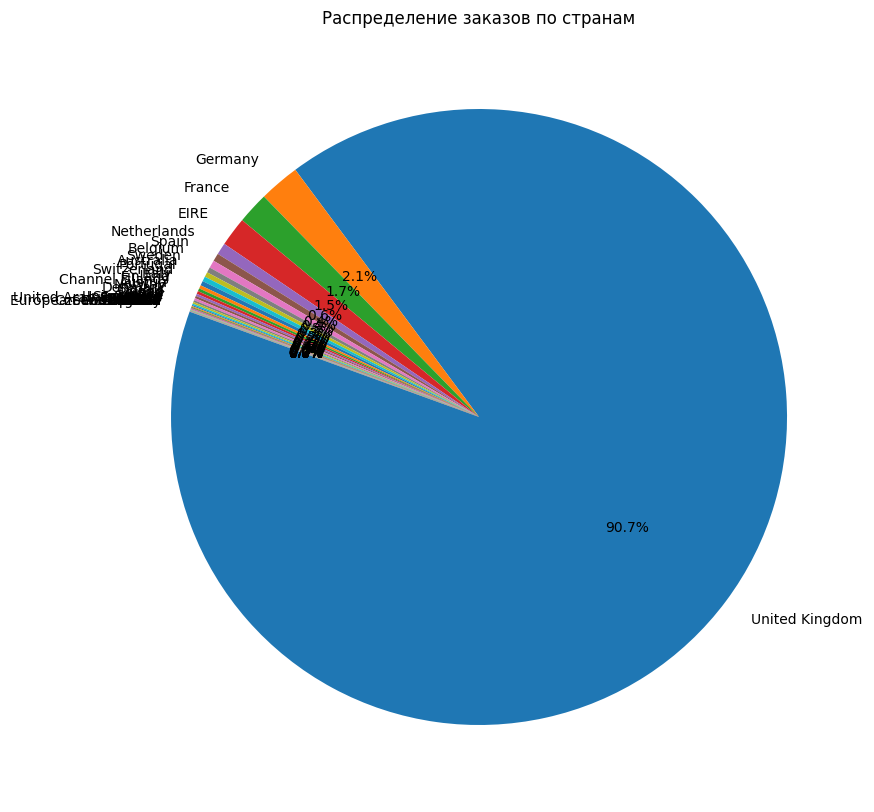

In [94]:
#4.6 Постройте pie chart распределения заказов по странам.
orders_by_country = df_positive.groupby('Country')['Invoice'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.pie(orders_by_country, labels=orders_by_country.index, autopct='%1.1f%%', startangle=160)
plt.title('Распределение заказов по странам')
plt.show()

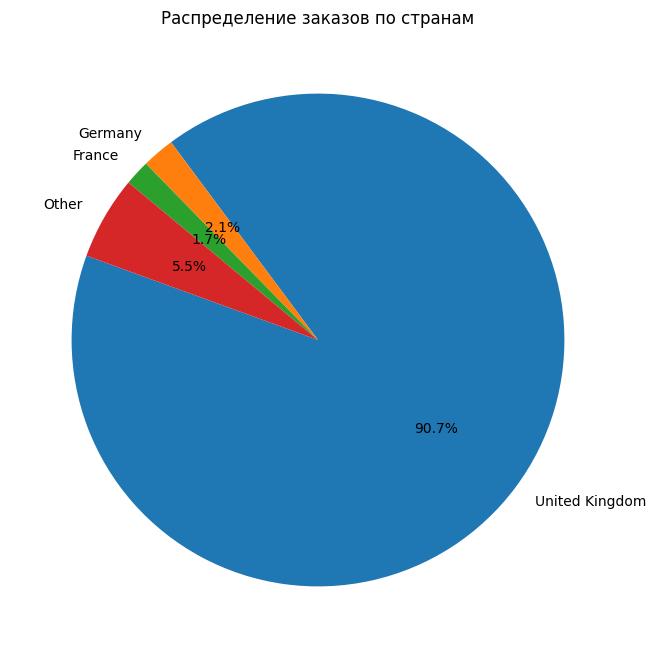

In [97]:
orders_by_country = (
    df_positive.groupby('Country')['Invoice']
    .nunique()
    .sort_values(ascending=False)
)

# Топ-3
top3 = orders_by_country.head(3)

# Остальные
other = orders_by_country.iloc[3:].sum()

# Объединяем
plot_data = pd.concat([top3, pd.Series({'Other': other})])

plt.figure(figsize=(10,8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=160)
plt.title('Распределение заказов по странам')
plt.show()

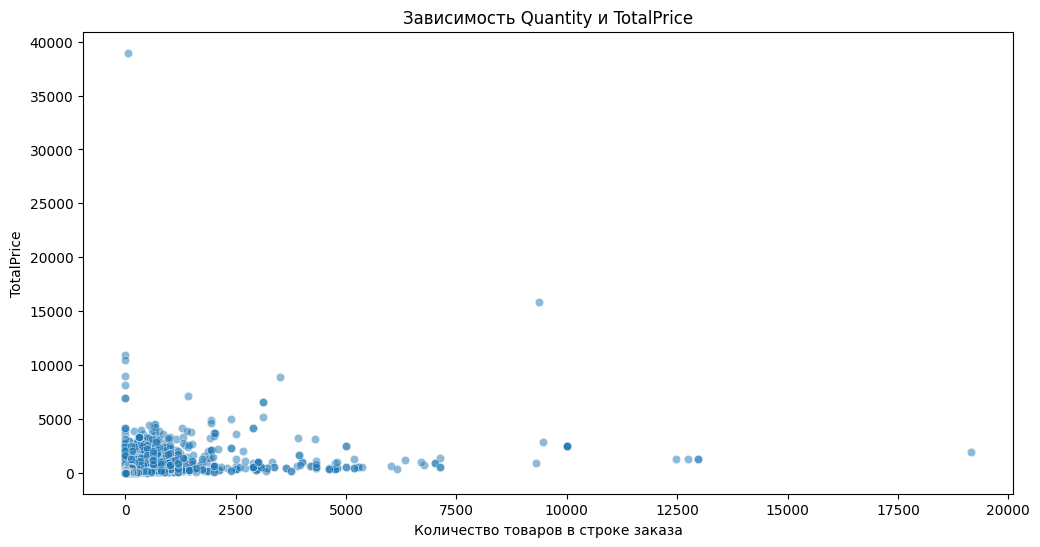

In [98]:
#4.7 Нарисуйте scatterplot зависимости `Quantity` и `TotalPrice`.
df_filtered = df_positive[(df_positive['Quantity'] <= 20000) & (df_positive['TotalPrice'] <= 50000)]
plt.figure(figsize=(12,6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df_filtered, alpha=0.5)
plt.title('Зависимость Quantity и TotalPrice')
plt.xlabel('Количество товаров в строке заказа')
plt.ylabel('TotalPrice')
plt.show()

In [99]:
# Сохраняем в CSV
df.to_csv("_data_cleaned_.csv", index=False)


- Найдите клиентов, которые чаще всего делают возвраты.
- Постройте Pareto-анализ (80/20): какая доля клиентов приносит 80% выручки?
- Постройте временной ряд выручки по месяцам и определите тренд.
- Сравните средний чек между странами — с помощью `sns.boxplot`.
- Выделите клиентов, которые делали заказы более чем в 3 разных месяцах.

In [100]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,IsReturn,Year,Month,Day,Weekday,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,0,2009,12,1,Tuesday,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0,2009,12,1,Tuesday,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0,2009,12,1,Tuesday,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,0,2009,12,1,Tuesday,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,0,2009,12,1,Tuesday,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,0,2011,12,9,Friday,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0,2011,12,9,Friday,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0,2011,12,9,Friday,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,0,2011,12,9,Friday,2011-12


In [101]:
df['IsReturn'].sum()

np.int64(18390)

In [102]:
users_IsReturn = (
    df.groupby(['Customer ID'], as_index=False)
    .agg(total_return=('IsReturn', 'sum'))
    .sort_values('total_return', ascending=False)
)
print(users_IsReturn.head(5))

      Customer ID  total_return
2565      14911.0           365
2965      15311.0           273
5165      17511.0           209
5495      17841.0           203
1452      13798.0           191


In [103]:
avg_revenue_country 

,Country,total_revenue,total_quantity,avg_revenue
21,Lebanon,1.693880e+03,386,4.388290
11,European Community,1.291750e+03,497,2.599095
4,Brazil,1.411870e+03,545,2.590587
15,Greece,1.899549e+04,7707,2.464706
7,Cyprus,2.403256e+04,10652,2.256155
22,Lithuania,4.892680e+03,2306,2.121717
23,Malta,5.192220e+03,2491,2.084392
12,Finland,2.951445e+04,14317,2.061497
29,RSA,1.933740e+03,943,2.050626
1,Austria,2.317760e+04,11306,2.050027


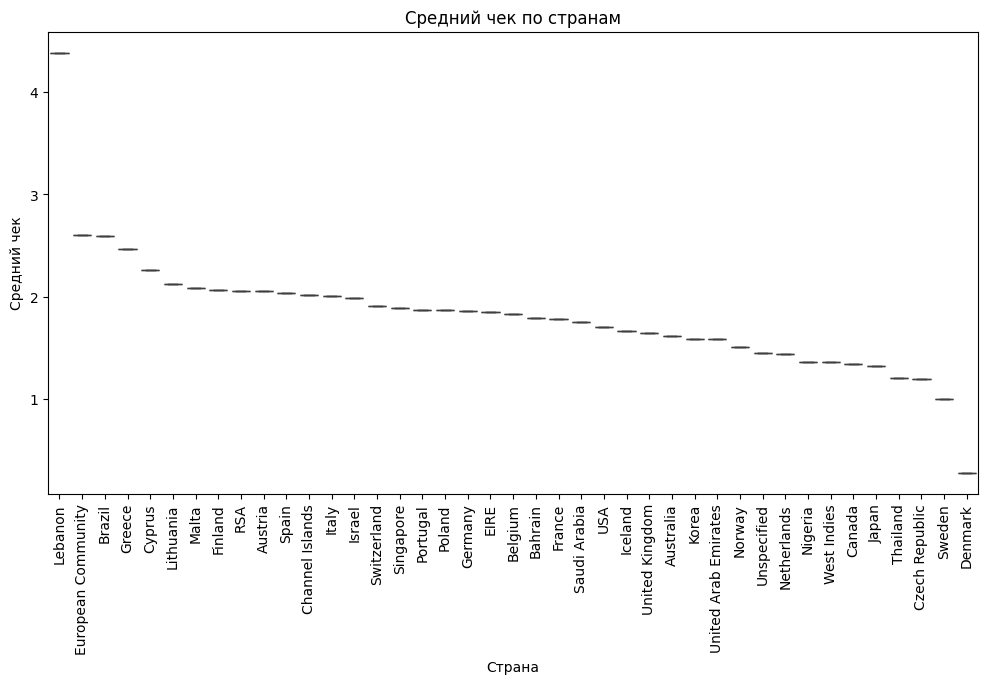

In [104]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Country', y='avg_revenue', data=avg_revenue_country )
plt.title('Средний чек по странам')
plt.xlabel('Страна')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)  # поворачиваем подписи стран для удобства
#plt.yscale('log')  # логарифмическая шкала, чтобы выбросы не сжимали график
plt.show()